In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("crop.csv")
df = df.sample(len(df))
df

,N,P,K,temperature,humidity,ph,rainfall,label
909,17,134,204,39.040720,80.183933,6.499605,73.884670,grapes
519,17,58,25,31.128968,43.587888,6.455593,32.767429,groundnuts
1084,99,6,45,26.125889,86.550794,6.000976,40.712101,watermelon
1544,68,41,16,21.876893,57.808406,8.158831,102.486169,maize
775,95,82,48,27.394896,83.311720,5.719015,92.781336,banana
...,...,...,...,...,...,...,...,...
1666,29,45,16,28.436835,87.913327,6.583382,43.120633,cowpeas
933,9,141,202,21.012454,81.179319,6.119495,66.384483,grapes
264,52,73,79,17.257695,18.749440,7.840339,94.002872,Soyabeans
1024,83,29,52,25.764027,87.593113,6.704689,46.051227,watermelon


<Axes: >

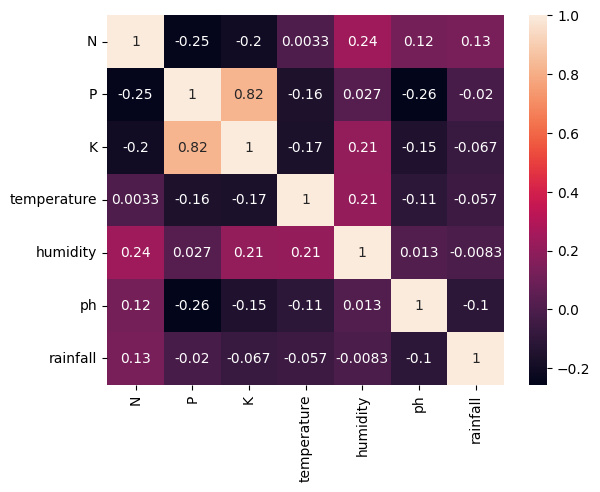

In [20]:
corr = df.drop("label", axis=1).corr()

sns.heatmap(corr, annot=True)

In [21]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [15]:
X, y = df.drop("label", axis=1), df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.score(X_test, y_test)

RandomForestClassifier()

In [24]:
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

1.0
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        41
       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        39
       beans       1.00      1.00      1.00        45
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        39
     cowpeas       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        32
  groundnuts       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        36
        peas       1.00      1.00      1.00        35
        rice       1.00      1.00      1.00        29
  watermelon       1.00      1.00      1.00        26

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.0

In [22]:
pd.set_option("display.max_rows", 30)
df[
    df.duplicated(subset=["temperature", "humidity", "ph", "rainfall"], keep=False)
].sort_values(by=["temperature", "humidity", "ph", "rainfall"])

,N,P,K,temperature,humidity,ph,rainfall,label
1213,19,7,10,14.780030,91.220621,6.118430,100.196176,orange
1651,19,7,10,14.780030,91.220621,6.118430,100.196176,orange
1619,1,62,23,15.435461,18.374779,5.607808,139.030203,beans
334,1,62,23,15.435461,18.374779,5.607808,139.030203,beans
343,32,57,18,15.538348,23.755602,5.695423,107.385059,beans
...,...,...,...,...,...,...,...,...
1208,39,24,14,30.554726,90.903438,7.189260,106.071198,orange
1650,6,9,12,31.083689,90.143626,7.028746,109.689466,orange
1212,6,9,12,31.083689,90.143626,7.028746,109.689466,orange
1654,31,8,7,34.514651,93.638127,7.163246,103.568493,orange


In [23]:
df = df.drop_duplicates(
    subset=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
)
df.shape

(1594, 8)

In [24]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
909,17,134,204,39.040720,80.183933,6.499605,73.884670,grapes
519,17,58,25,31.128968,43.587888,6.455593,32.767429,groundnuts
1084,99,6,45,26.125889,86.550794,6.000976,40.712101,watermelon
1544,68,41,16,21.876893,57.808406,8.158831,102.486169,maize
775,95,82,48,27.394896,83.311720,5.719015,92.781336,banana
...,...,...,...,...,...,...,...,...
913,16,139,203,17.828037,80.960934,6.275641,65.847488,grapes
933,9,141,202,21.012454,81.179319,6.119495,66.384483,grapes
264,52,73,79,17.257695,18.749440,7.840339,94.002872,Soyabeans
1024,83,29,52,25.764027,87.593113,6.704689,46.051227,watermelon


In [30]:
X, y = df.drop(["N", "K", "humidity", "label"], axis=1), df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.score(X_test, y_test)

RandomForestClassifier()

In [31]:
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.9478079331941545
              precision    recall  f1-score   support

   Soyabeans       0.95      1.00      0.97        37
       apple       1.00      1.00      1.00        34
      banana       0.94      1.00      0.97        32
       beans       0.91      0.86      0.88        35
      coffee       0.97      0.97      0.97        36
      cotton       0.72      0.95      0.82        19
     cowpeas       0.97      0.95      0.96        38
      grapes       1.00      1.00      1.00        34
  groundnuts       0.92      0.96      0.94        25
       maize       0.85      0.74      0.79        31
       mango       0.96      1.00      0.98        23
      orange       1.00      0.95      0.97        38
        peas       0.96      0.83      0.89        30
        rice       0.97      1.00      0.99        39
  watermelon       1.00      1.00      1.00        28

    accuracy                           0.95       479
   macro avg       0.94      0.95      0.94       479
weighte

<Axes: >

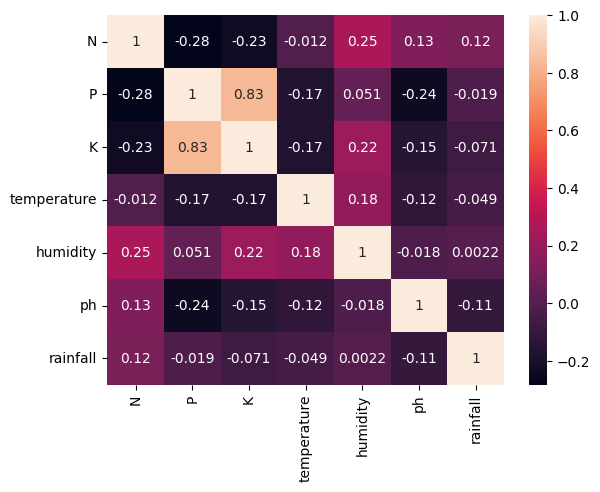

In [27]:
corr = df.drop("label", axis=1).corr()

sns.heatmap(corr, annot=True)

In [14]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,53.157465,58.504391,53.709536,24.690410,65.732970,6.441559,99.504943
std,38.358024,34.568313,58.362368,4.953632,24.212157,0.883872,51.474777
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,22.000000,36.000000,20.000000,21.588696,51.263068,5.864478,66.833034
50%,37.000000,53.500000,29.000000,24.882009,77.362465,6.355057,91.905004
75%,90.000000,72.000000,52.000000,27.776905,83.694175,6.932689,115.377537
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [15]:
scaler = StandardScaler()

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

1.0
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        42
       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        30
       beans       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        37
     cowpeas       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        32
  groundnuts       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        36
       mango       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        34
        peas       1.00      1.00      1.00        34
        rice       1.00      1.00      1.00        39
  watermelon       1.00      1.00      1.00        24

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.0

In [17]:
df.sort_values(by=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"])

,N,P,K,temperature,humidity,ph,rainfall,label
1235,0,12,7,20.184323,90.654585,6.969250,116.813097,orange
879,0,17,30,35.474783,47.972305,6.279134,97.790725,mango
1207,0,18,14,29.771494,92.007200,7.207991,114.416179,orange
804,0,21,32,35.898556,54.259642,6.430139,92.197217,mango
1241,0,23,15,22.566642,93.374889,7.598729,109.858575,orange
...,...,...,...,...,...,...,...,...
1374,136,36,24,22.744470,80.411985,7.597820,90.073266,cotton
1328,139,35,15,25.248679,83.463015,5.898293,86.555178,cotton
1312,140,38,15,24.147295,75.882986,6.021440,69.915635,cotton
1350,140,40,17,22.727672,77.075981,6.006086,77.551763,cotton
